In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import bemcs

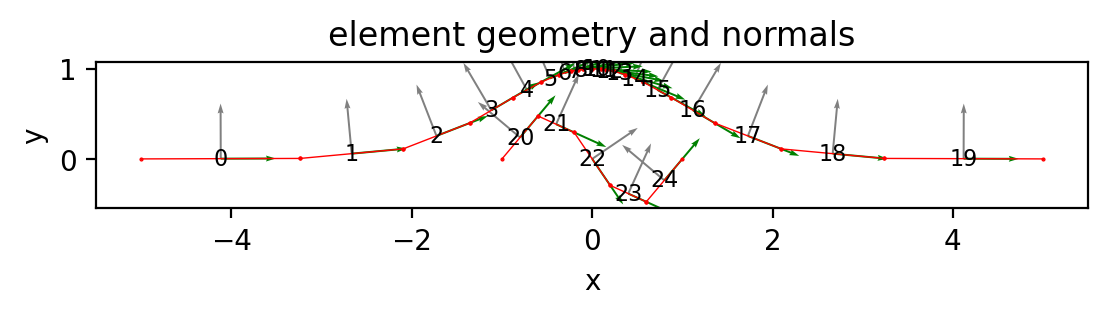

In [8]:
# Create fault and topography mesh
# create a mesh of topography
topo_n = 20  # only even number
topo_L = 10  # fault length in x
topo_amp = 1  # amplitude of topography as a Gaussian
topo_sigma = 1  # spread of Gaussian topography

xlogvals = np.logspace(-1.0, np.log10(topo_L / 2), int(topo_n / 2))
xmesh = np.concatenate((-xlogvals[::-1], [0.0], xlogvals))
xt1 = xmesh[0:-1]
xt2 = xmesh[1:]
yt1 = topo_amp * np.exp(-(xt1**2) / 2 / (topo_sigma**2))
yt2 = topo_amp * np.exp(-(xt2**2) / 2 / (topo_sigma**2))

# create a mesh of the fault
# Specify amplitude and number of wavelengths for sinusoidal fault geometry
fault_n = 5
fault_amp = -0.5
fault_cycles = 1.0
fault_L = 2.0

# Sinusoidal y-positions for fault elements
sorted_xlocs = np.linspace(
    -fault_L / 2 + fault_L / fault_n,
    fault_L / 2 - fault_L / fault_n,
    fault_n - 1,
)

# Wavy fault geometry
xf1 = np.concatenate((np.array([-fault_L / 2.0]), sorted_xlocs))
xf2 = np.concatenate((sorted_xlocs, np.array([fault_L / 2.0])))
yf1 = fault_amp * np.sin(fault_cycles * 2 * np.pi * xf1 / fault_L)
yf2 = fault_amp * np.sin(fault_cycles * 2 * np.pi * xf2 / fault_L)

# create bemcs data structure
els = bemcs.initialize_els()
els.x1 = np.concatenate([xt1, xf1])
els.y1 = np.concatenate([yt1, yf1])
els.x2 = np.concatenate([xt2, xf2])
els.y2 = np.concatenate([yt2, yf2])
bemcs.standardize_els_geometry(els)
bemcs.plot_els_geometry(els)

In [ ]:
# Elastic parameters
mu = 1
nu = 0.25